In [3]:
import sentencepiece as spm
import pandas as pd
import numpy as np
import time

from sklearn.feature_extraction.text import *
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

sp = spm.SentencePieceProcessor()
sp.Load('../mongolian_bert_sentencepiece/mn_uncased.model')

def sp_tokenize(w):
    return sp.EncodeAsPieces(w)

print('Text:', 'Мөнгөө тушаачихсаныхаа дараа мэдэгдээрэй\n')
print('Tokenized:', " ".join(sp_tokenize('Мөнгөө тушаачихсаныхаа дараа мэдэгдээрэй'.lower())))

Text: Мөнгөө тушаачихсаныхаа дараа мэдэгдээрэй

Tokenized: ▁мөнгөө ▁тушаа чихсан ыхаа ▁дараа ▁мэдэгд ээрэй


In [2]:
df_path = '../../main_dataset/'
trained_model_and_fitted_encoder_path = '../models/'
plots_path = '../plots/'

url = 'https://drive.google.com/file/d/1PCMROt6zbd90AfODLSEGogYfqzHnohTx/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id=' + url.split('/')[-2]
df = pd.read_csv(path)

# show labels
print('labels', df['type_text'].unique().tolist())

labels ['Гомдол', 'Санал хүсэлт', 'Асуулт', 'Шүүмжлэл', 'Талархал', 'Өргөдөл']


In [3]:
# Stratified train and test split
train, test = train_test_split(df, test_size=0.1, random_state=999, stratify=df['type_text'])

In [4]:
text_clf = Pipeline([('vect', CountVectorizer(tokenizer=sp_tokenize, lowercase=True)),
                     ('tfidf', TfidfTransformer()),
                     ('clf', SGDClassifier(loss='hinge', penalty='l2', alpha=1e-4, max_iter=5, random_state=0))])

t = time.time()
text_clf = text_clf.fit(train['content'], train['type_text'])
t = time.time()-t
print("Training time in seconds: ", t)

t = time.time()
predicted = text_clf.predict(test['content'])
t = time.time()-t
print("Prediction time in seconds: ", t)

print("Feature count:", len(text_clf.named_steps['vect'].vocabulary_))
print("Classifier accuracy: ", np.mean(predicted == test['type_text']))

Training time in seconds:  2.013360023498535
Prediction time in seconds:  0.20117688179016113
Feature count: 19526
Classifier accuracy:  0.8179337231968811


/Users/razydave/intern/tasks/ll_env/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


In [5]:
text_clf.predict(['Танайх чинь одоо яачихсан газар вэ. Хүнд сурталтай!'])

array(['Гомдол'], dtype='<U12')

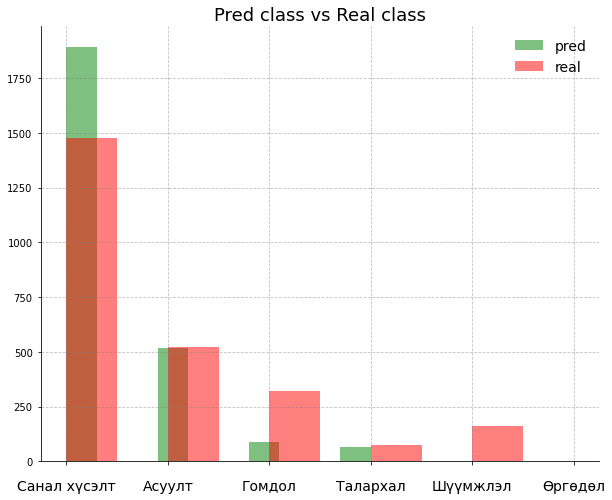

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize = (10, 8))
ax.set_title('Pred class vs Real class', fontsize = 18)

ax.hist(predicted, color = 'green', alpha = 0.5);
ax.hist(test['type_text'], alpha = 0.5, color = 'red');
ax.legend(['pred', 'real'], fontsize = 14, frameon = False)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.tick_params(axis = 'x', pad = 14, labelsize = 14)
ax.tick_params(axis = 'y', pad = 5, labelsize = 10)

ax.grid(alpha = 0.5, linestyle = '--', c = 'gray')
#fig.savefig(plots_path + 'pred_v_real.png')

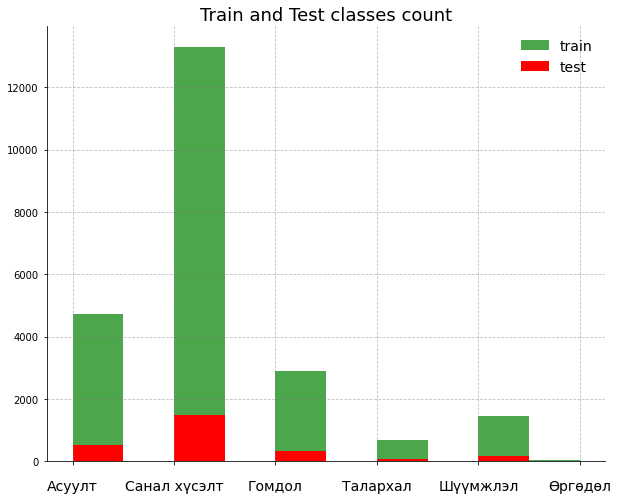

In [7]:
fig, ax = plt.subplots(figsize = (10, 8))
ax.set_title('Train and Test classes count', fontsize = 18)

ax.hist(train['type_text'], color = 'green', alpha = 0.7);
ax.hist(test['type_text'], color = 'red', alpha = 1);
ax.legend(['train', 'test'], fontsize = 14, frameon = False)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.tick_params(axis = 'x', pad = 14, labelsize = 14)
ax.tick_params(axis = 'y', pad = 5, labelsize = 10)

ax.grid(alpha = 0.5, linestyle = '--', c = 'gray')
#fig.savefig(plots_path + s'train_test_classes_all.png')